In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [19]:
df = pd.read_csv('data/WineQT.csv')
df = df.drop('Id', axis = 1)

In [20]:
print('No. of rows:', df.shape[0])
print('No. of columns:', df.shape[1])
df

No. of rows: 1143
No. of columns: 12


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [22]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


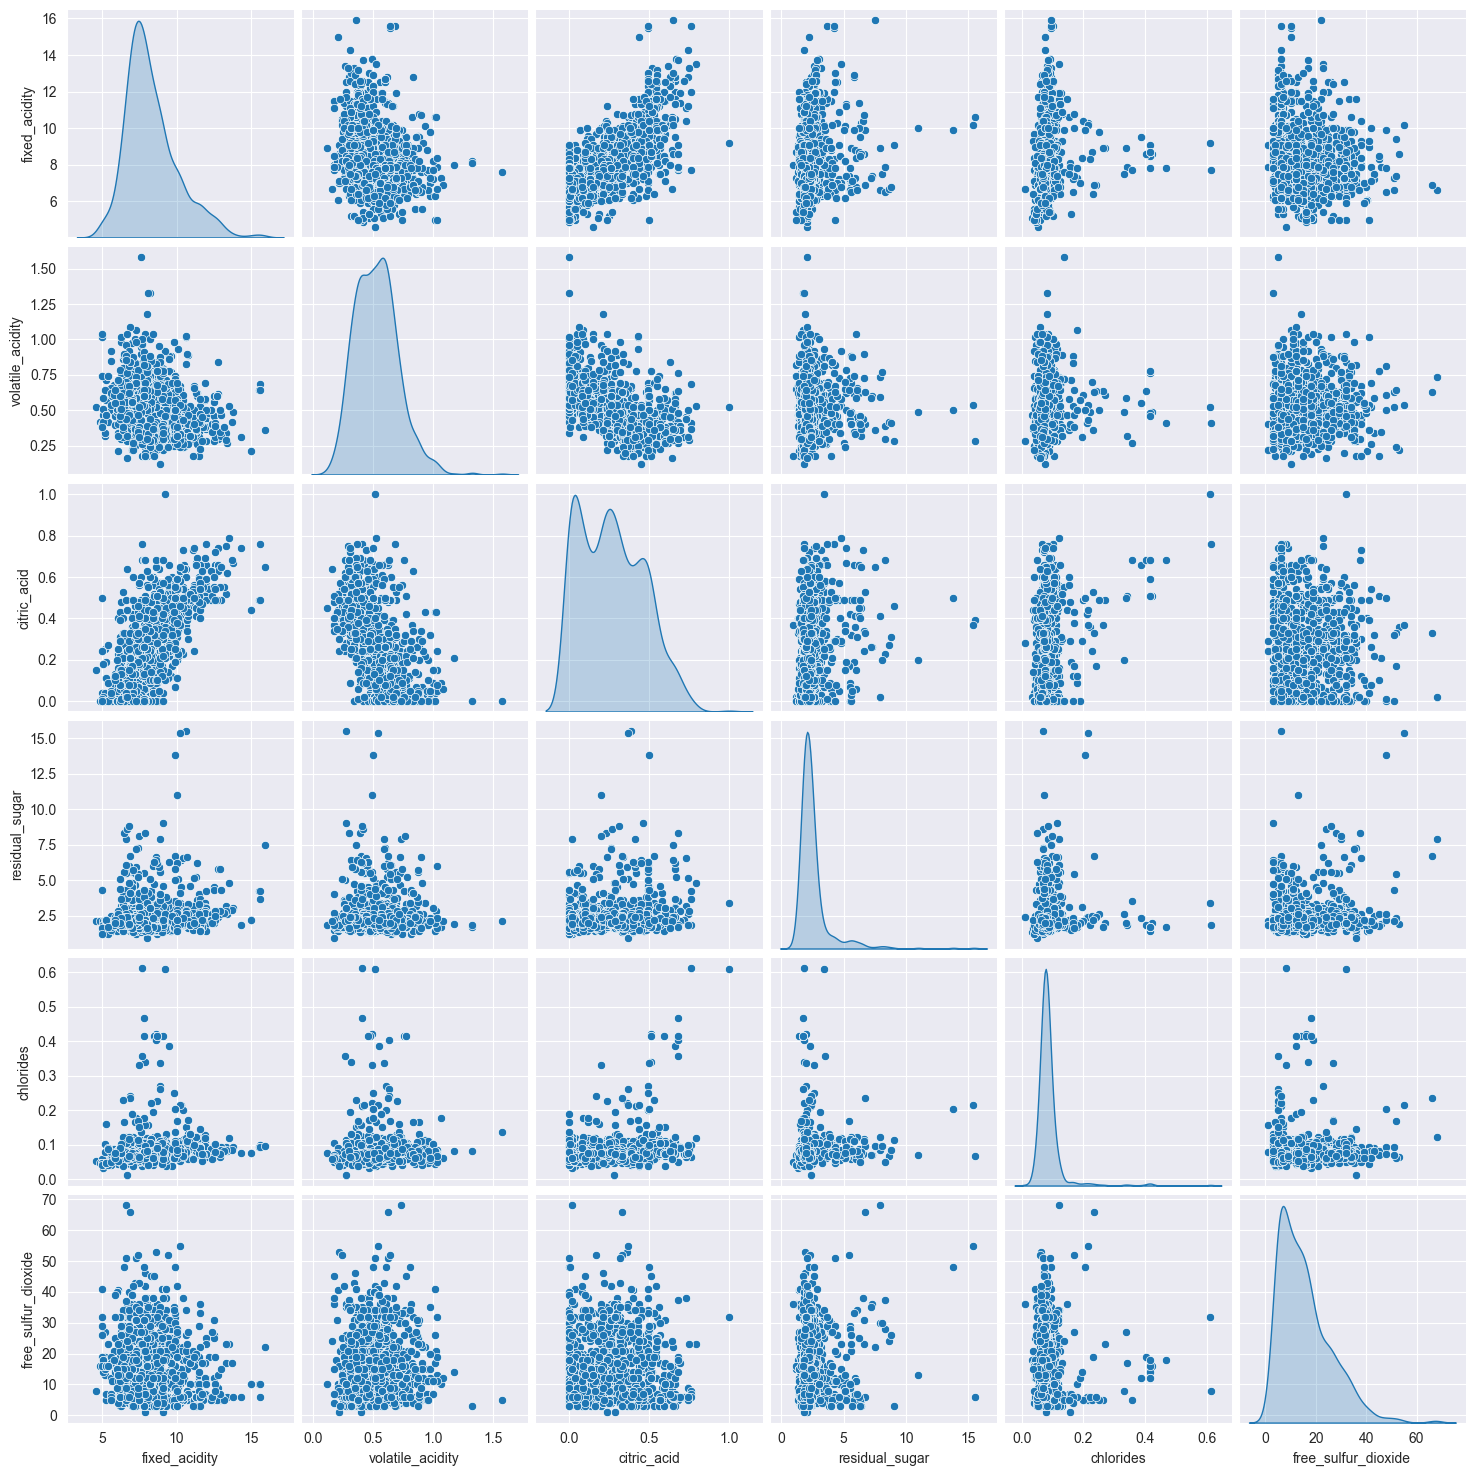

In [24]:
sns.pairplot(df[df.columns[:6]], diag_kind="kde")

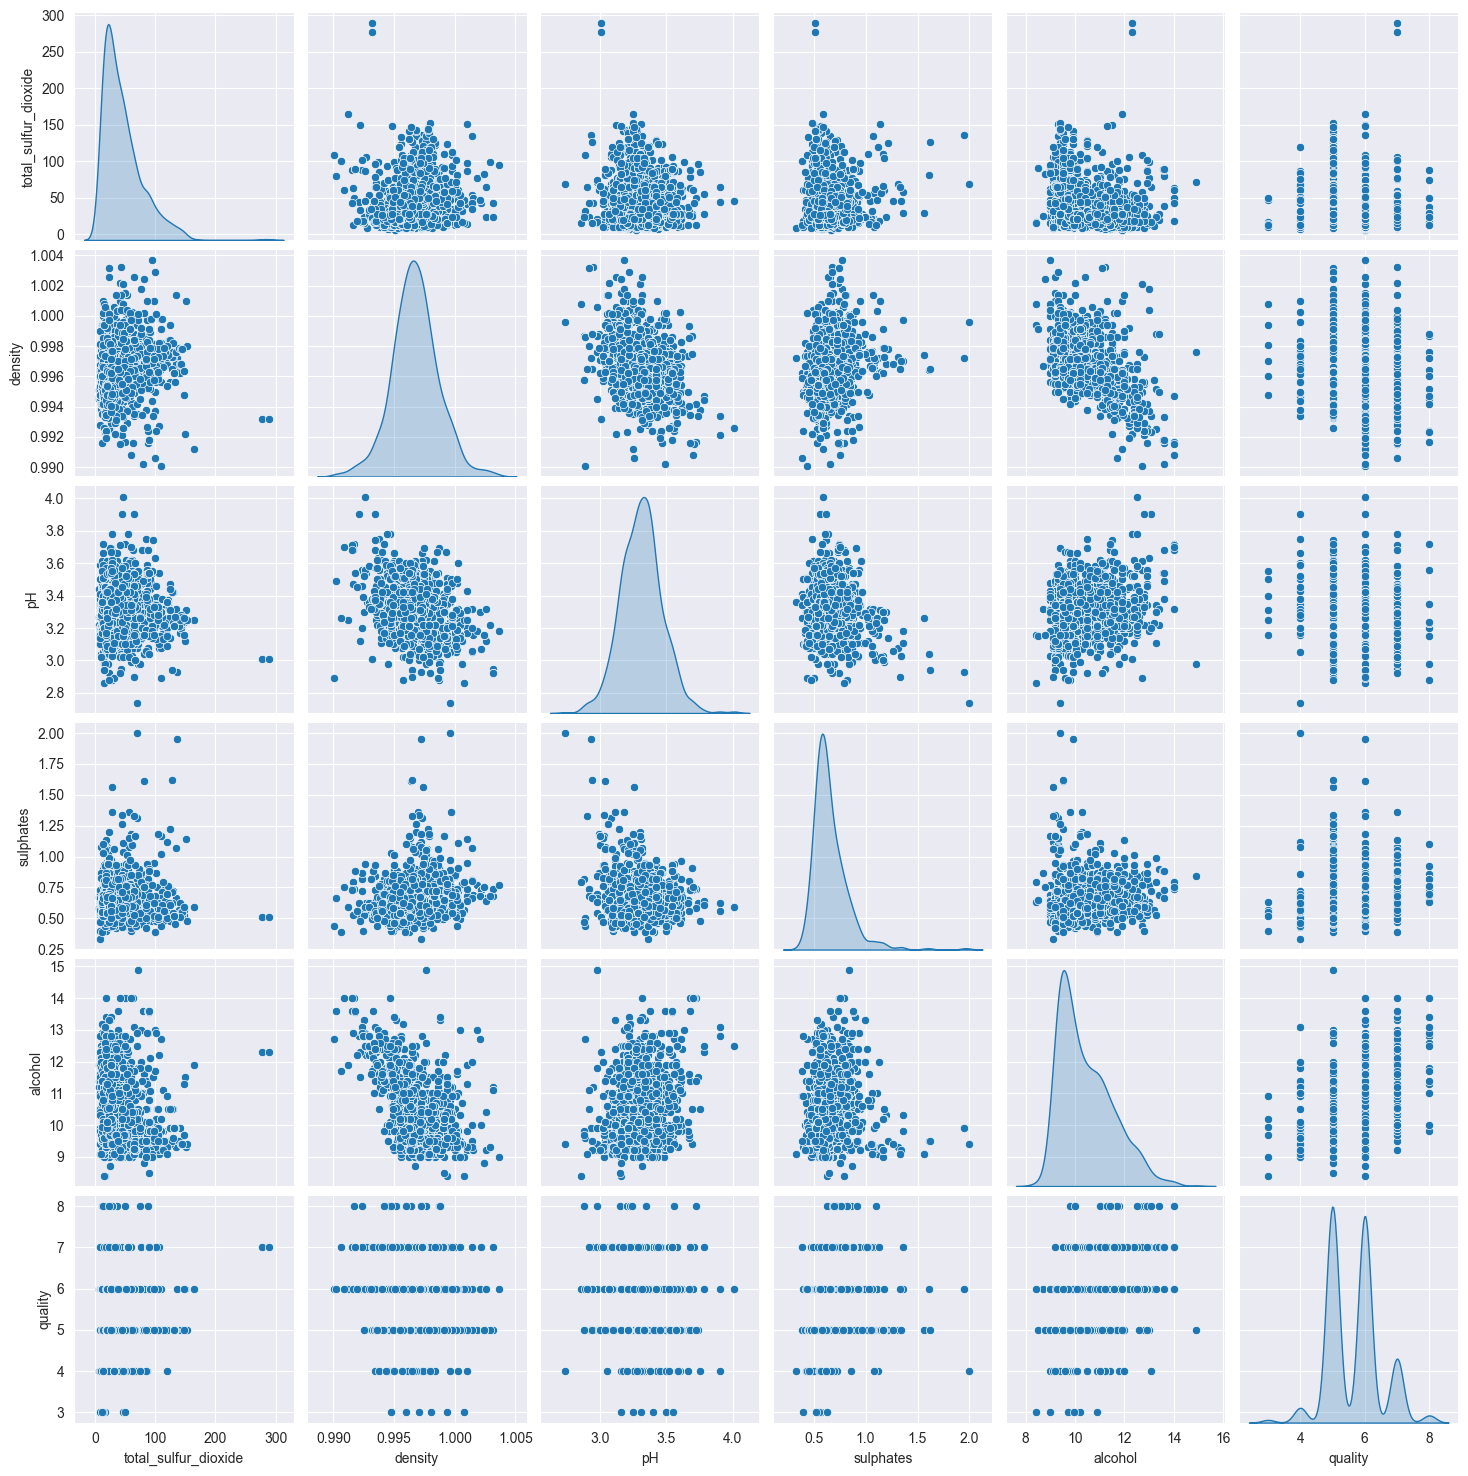

In [25]:
sns.pairplot(df[df.columns[6:]], diag_kind="kde")

<AxesSubplot: xlabel='quality', ylabel='count'>

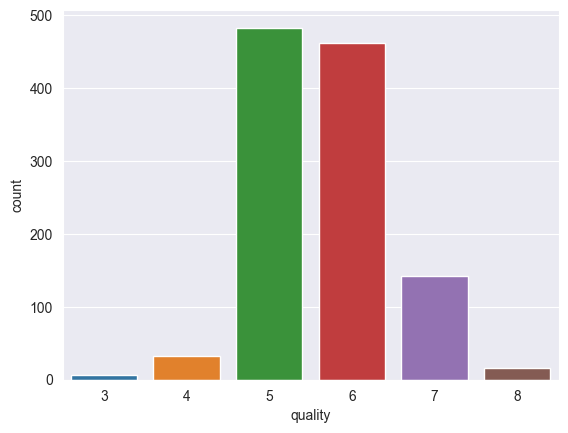

In [26]:
sns.countplot(x='quality',data=df)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'fixed_acidity'),
  Text(1.5, 0, 'volatile_acidity'),
  Text(2.5, 0, 'citric_acid'),
  Text(3.5, 0, 'residual_sugar'),
  Text(4.5, 0, 'chlorides'),
  Text(5.5, 0, 'free_sulfur_dioxide'),
  Text(6.5, 0, 'total_sulfur_dioxide'),
  Text(7.5, 0, 'density'),
  Text(8.5, 0, 'pH'),
  Text(9.5, 0, 'sulphates'),
  Text(10.5, 0, 'alcohol'),
  Text(11.5, 0, 'quality')])

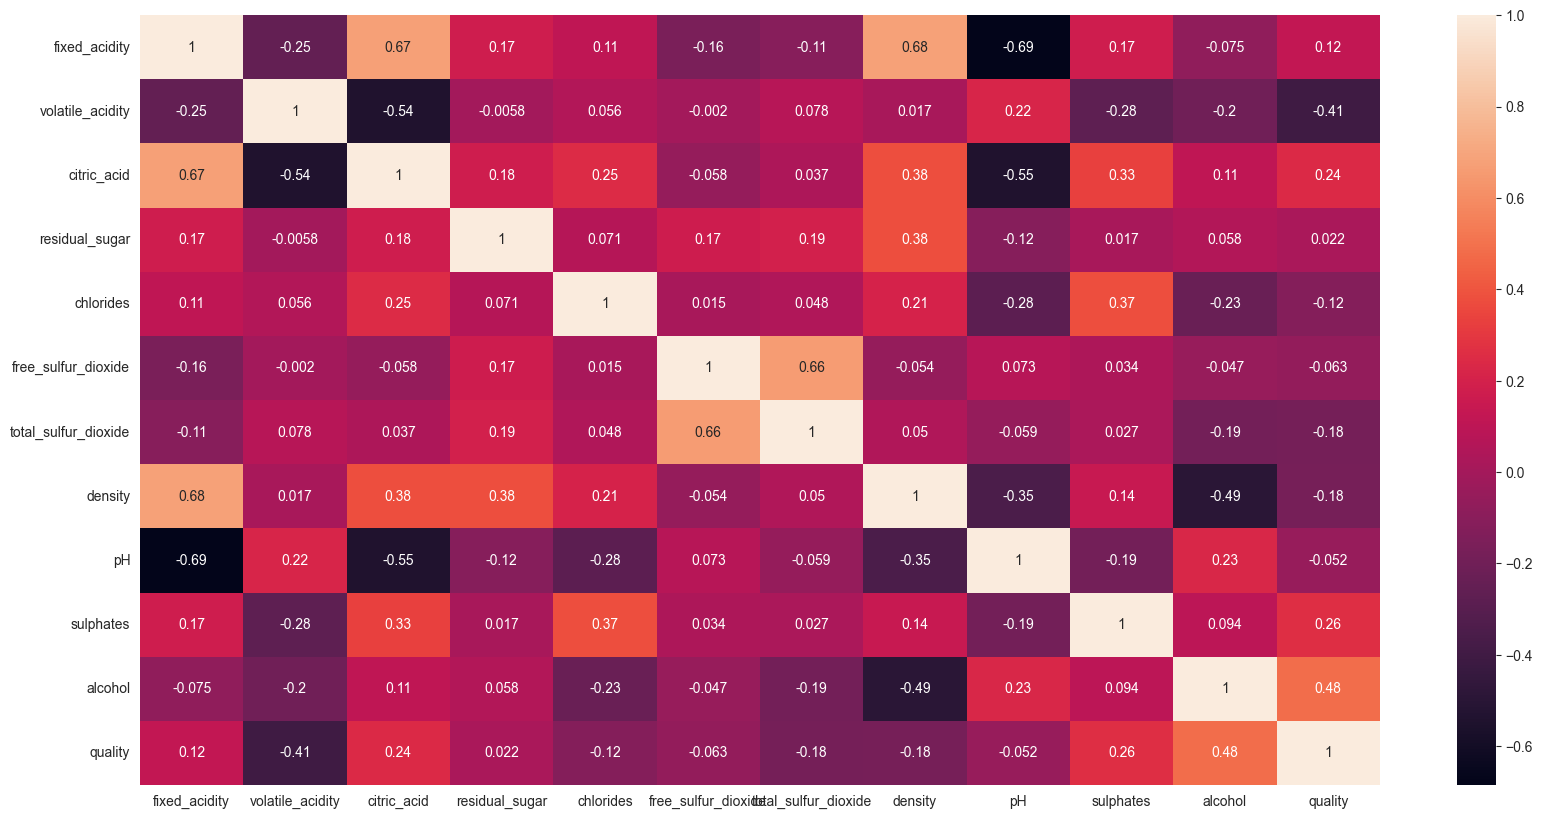

In [27]:
plt.figure(figsize = (20,10))
corr_matrix = df.corr()
map = sns.heatmap(corr_matrix, annot = True, xticklabels=df.columns)
plt.xticks(rotation = 0)

In [28]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric_acid             0.240821
fixed_acidity           0.121970
residual_sugar          0.022002
pH                     -0.052453
free_sulfur_dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total_sulfur_dioxide   -0.183339
volatile_acidity       -0.407394
Name: quality, dtype: float64

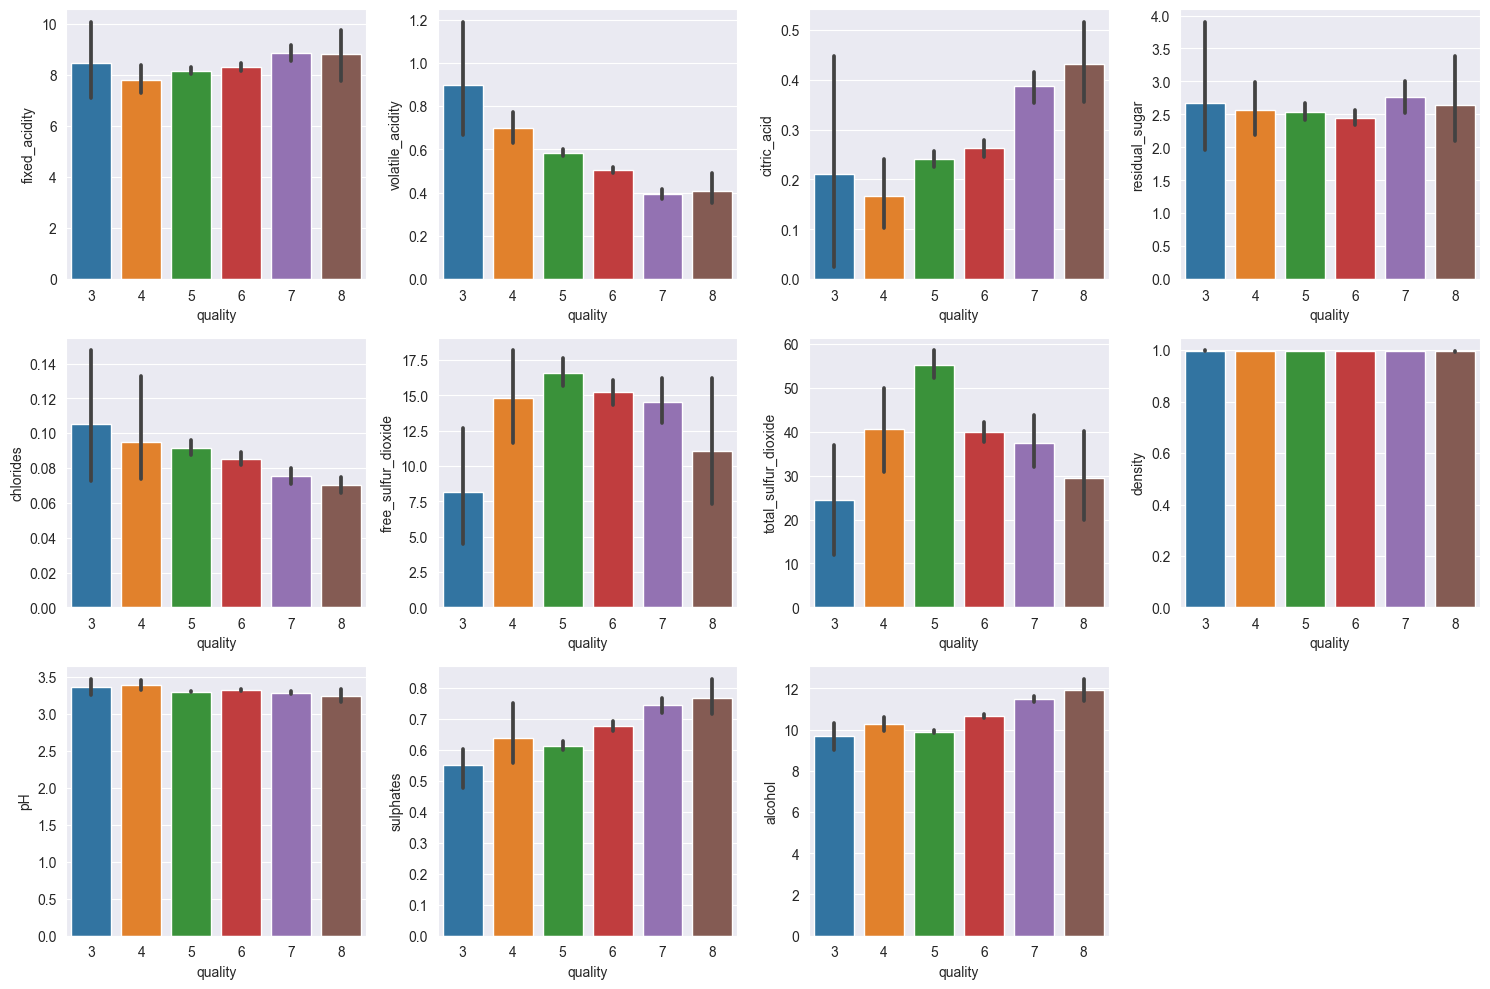

In [29]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed_acidity',data=df)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile_acidity',data=df)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric_acid',data=df)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual_sugar',data=df)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free_sulfur_dioxide',data=df)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total_sulfur_dioxide',data=df)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)
plt.tight_layout()

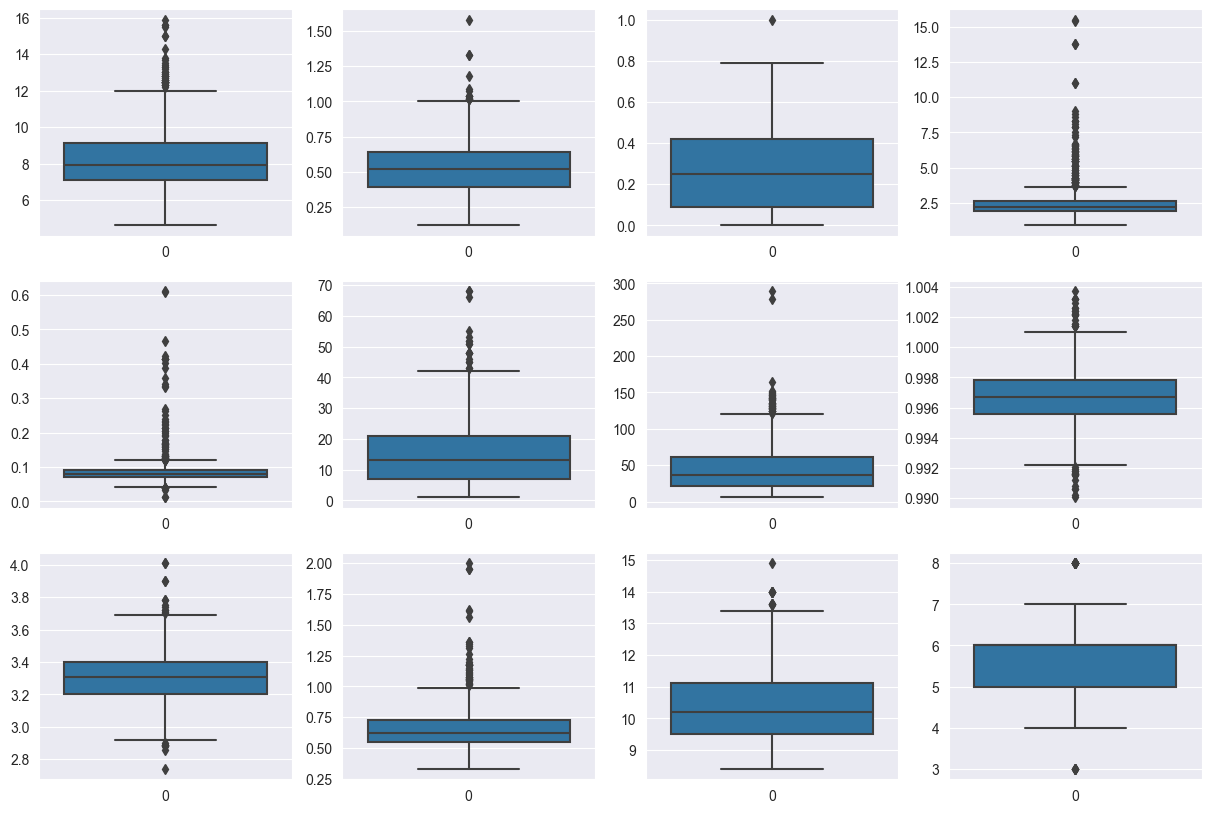

In [30]:
fig,axis=plt.subplots(ncols=4,nrows=3,figsize=(15,10))
index = 0
axis = axis.flatten()

for col,data in df.items():
    sns.boxplot(data = df[col], ax = axis[index])
    index += 1

In [31]:
data = df.copy()
print(df)
df=df._get_numeric_data()
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
lower_bound

for col in df.columns:
    for i in range(0,len(data[col])):
        if data[col][i] < lower_bound[col]:
            data[col][i] = lower_bound[col]

        if data[col][i] > upper_bound[col]:
            data[col][i] = upper_bound[col]

for col in data.columns:
            df[col]=data[col]


df

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free_sulfur_dioxide  

C:\Users\1\AppData\Local\Temp\ipykernel_14648\639293913.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound[col]
C:\Users\1\AppData\Local\Temp\ipykernel_14648\639293913.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound[col]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0


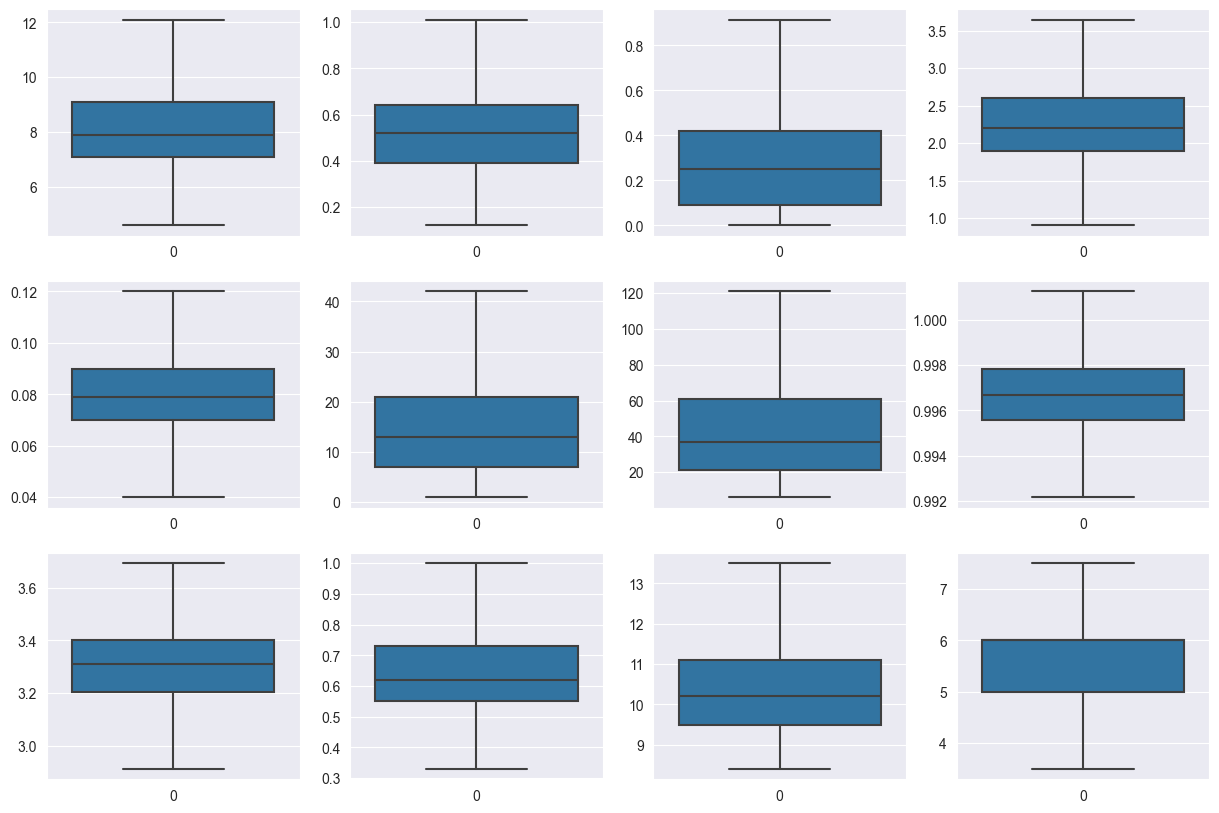

In [33]:
fig,axis=plt.subplots(ncols=4,nrows=3,figsize=(15,10))
index = 0
axis = axis.flatten()

for col,data in df.items():
    sns.boxplot(data = df[col], ax = axis[index])
    index += 1

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality']=le.fit_transform(df['quality'])

In [35]:
X=df.drop(['quality'],axis=1)
y=df['quality']

In [36]:
y.shape

(1143,)

In [37]:
from imblearn.over_sampling import SMOTE

X,y = SMOTE().fit_resample(X,y)
y.value_counts()

2    483
3    483
4    483
1    483
5    483
0    483
Name: quality, dtype: int64

In [38]:
y.shape

(2898,)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [40]:
y_train.shape

(2318,)

In [41]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred1 = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score
acc_score1=accuracy_score(y_test,y_pred1)
print("Accuracy Score:",acc_score1)

Accuracy Score: 0.6051724137931035


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)

acc_score4=accuracy_score(y_test,y_pred4)
print("Accuracy Score:",acc_score4)

Accuracy Score: 0.8275862068965517


In [44]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
print(acc_score)

0.7689655172413793


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=15)
gbc.fit(X_train,y_train)

pred_gbc = gbc.score(X_test, y_test)
print(pred_gbc)



0.7896551724137931


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)

acc_score3=accuracy_score(y_test,pred_dt)
print("Accuracy Score:",acc_score3)

Accuracy Score: 0.746551724137931


In [49]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)
pred_xgb_model = xgb_model.predict(X_test)

acc_score5=accuracy_score(y_test,pred_xgb_model)
print("Accuracy Score:",acc_score5)

Accuracy Score: 0.8224137931034483


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

acc_score2=accuracy_score(y_test,pred_knn)
print("Accuracy Score:",acc_score2)

Accuracy Score: 0.7810344827586206


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cv_log_reg = cross_val_score(log_reg,X_train,y_train,cv = 10)
mean_acc_score = round(cv_log_reg.mean(),4)
print(mean_acc_score)

0.613


In [55]:
cv_rf = cross_val_score(rf,X_train,y_train,cv = 10)
mean_acc_score = round(cv_rf.mean(),4)
print(mean_acc_score)

0.8524


In [56]:
cv_svm_clf = cross_val_score(svm_clf, X_train, y_train, cv=10)
mean_acc_score = round(cv_svm_clf.mean(), 4)
print(mean_acc_score)

0.7882


In [57]:
cv_gbc = cross_val_score(gbc, X_train, y_train, cv=10)
mean_acc_score = round(cv_gbc.mean(), 4)
print(mean_acc_score)

0.786


In [58]:
cv_dt = cross_val_score(dt, X_train, y_train, cv=10)
mean_acc_score = round(cv_dt.mean(), 4)
print(mean_acc_score)

0.7865


In [59]:
cv_xgb_model = cross_val_score(xgb_model, X_train, y_train, cv=10)
mean_acc_score = round(cv_xgb_model.mean(), 4)
print(mean_acc_score)

0.8572


In [60]:
cv_knn = cross_val_score(knn, X_train, y_train, cv=10)
mean_acc_score = round(cv_knn.mean(), 4)
print(mean_acc_score)

0.7869
